In [1]:
#Import the library
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
from scipy.stats import norm
%matplotlib inline

In [2]:
df = pd.read_csv('S:\dataproject\AI Summer/train.csv')

In [3]:
df.head(8)

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No
5,60DE6HXH6KQRETDXAHLK,Male,No,Yes,Yes,27,Yes,Satellite Broadband,Yes,No,No,Yes,Card,96.384275,2650.779905,Yes
6,7GOZ81H8YZXQ3YPMZEB0,Male,Yes,Yes,No,53,Yes,Wifi Broadband,No,No,No,No,Check,17.291325,1032.254126,No
7,LTKNFUXFICQI8MSX5RWI,Female,Yes,No,Yes,0,Yes,Wifi Broadband,No,No,No,No,Electronic,70.062808,70.934345,Yes


In [4]:
print(df.shape)

(6338, 16)


In [5]:
df.columns.values

array(['ID', 'sex', 'Aged', 'Married', 'TotalDependents', 'ServiceSpan',
       'MobileService', '4GService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription', 'SettlementProcess',
       'QuarterlyPayment', 'GrandPayment', 'CustomerAttrition'],
      dtype=object)

In [6]:
df.isna().sum()

ID                      0
sex                     0
Aged                    0
Married                 0
TotalDependents         0
ServiceSpan             0
MobileService           0
4GService               0
CyberProtection         0
HardwareSupport         0
TechnicalAssistance     0
FilmSubscription        0
SettlementProcess       0
QuarterlyPayment        0
GrandPayment           10
CustomerAttrition       0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

ID                     0
sex                    0
Aged                   0
Married                0
TotalDependents        0
ServiceSpan            0
MobileService          0
4GService              0
CyberProtection        0
HardwareSupport        0
TechnicalAssistance    0
FilmSubscription       0
SettlementProcess      0
QuarterlyPayment       0
GrandPayment           0
CustomerAttrition      0
dtype: int64

In [9]:
df.describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,6328.000000,6328.000000,6328.000000
mean,31.996365,64.854863,2290.544207
std,24.546344,30.184497,2265.181098
min,-1.000000,16.504109,16.297961
25%,8.000000,35.694447,401.849530
50%,29.000000,70.568405,1407.589119
75%,55.000000,90.078020,3823.855846
max,73.000000,120.159190,8685.848657


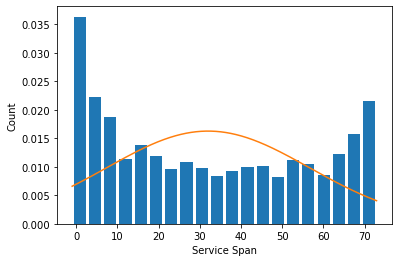

In [10]:
plt.hist(df.ServiceSpan,bins=20, rwidth = 0.8, density=True)
plt.xlabel('Service Span')
plt.ylabel('Count')

rng = np.arange(df.ServiceSpan.min(),df.ServiceSpan.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.ServiceSpan.mean(),df.ServiceSpan.std()))

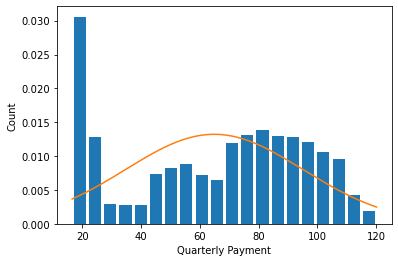

In [11]:
plt.hist(df.QuarterlyPayment,bins=20, rwidth = 0.8, density=True)
plt.xlabel('Quarterly Payment')
plt.ylabel('Count')

rng = np.arange(df.QuarterlyPayment.min(),df.QuarterlyPayment.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.QuarterlyPayment.mean(),df.QuarterlyPayment.std()))

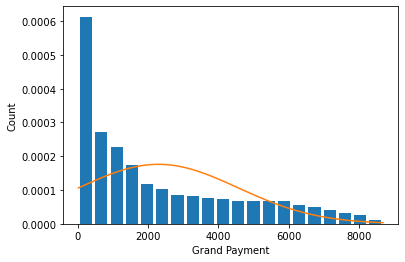

In [12]:
plt.hist(df.GrandPayment,bins=20, rwidth = 0.8, density=True)
plt.xlabel('Grand Payment')
plt.ylabel('Count')

rng = np.arange(df.GrandPayment.min(),df.GrandPayment.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.GrandPayment.mean(),df.GrandPayment.std()))

In [13]:
df = df[df.ServiceSpan > 0]
df

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6332,07HD9DL5IFEF06ADGZQJ,Male,No,No,No,2,Yes,No,No,No,No,Yes,Electronic,70.750293,69.094592,Yes
6333,Y7U717HO87PCW6XXIQA1,Female,Yes,No,No,3,Yes,Wifi Broadband,No,Yes,No,Yes,Card,100.391595,441.914530,Yes
6335,ZBBW7H8AYLZJ2HK5TBBJ,Male,No,No,Yes,18,Yes,No,No,No,No,No,Electronic,35.941713,552.181341,Yes
6336,BUE75NSSLT2S2URTKZRN,Male,No,Yes,No,46,Yes,No,No,No,No,Yes,Card,94.762984,4563.812326,No


In [14]:
#Get the number of customers that churned
df['CustomerAttrition'].value_counts()

No     4603
Yes    1592
Name: CustomerAttrition, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustomerAttrition', ylabel='count'>

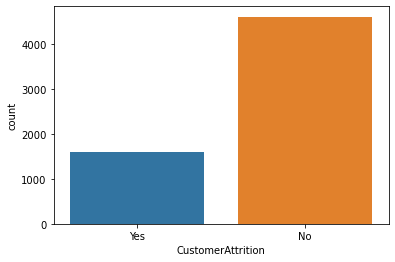

In [15]:
sns.countplot(df['CustomerAttrition'])

In [16]:
#What percentage of customers are leaving ?
retained = df[df.CustomerAttrition == 'No']
churned = df[df.CustomerAttrition == 'Yes']
num_retained = retained.shape[0]
num_churned = churned.shape[0]
#Print the percentage of customers that stayed and left
print( num_retained / (num_retained + num_churned) * 100 , "% of customers stayed with the company.")
#Print the percentage of customers that stayed and left
print( num_churned / (num_retained + num_churned) * 100,"% of customers left the company.")

74.30185633575465 % of customers stayed with the company.
25.69814366424536 % of customers left the company.


<AxesSubplot:xlabel='sex', ylabel='count'>

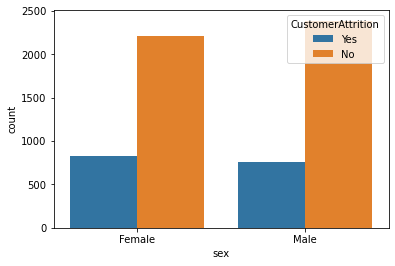

In [17]:
#Visualize the churn count for both Males and Females
sns.countplot(x='sex', hue='CustomerAttrition',data = df)

<AxesSubplot:xlabel='4GService', ylabel='count'>

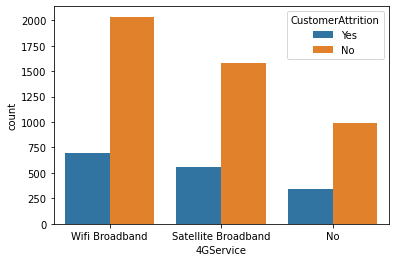

In [18]:
#Visualize the churn count for the internet service
sns.countplot(x='4GService', hue='CustomerAttrition', data = df)

array([<AxesSubplot:title={'center':'QuarterlyPayment'}>,
       <AxesSubplot:title={'center':'GrandPayment'}>], dtype=object)

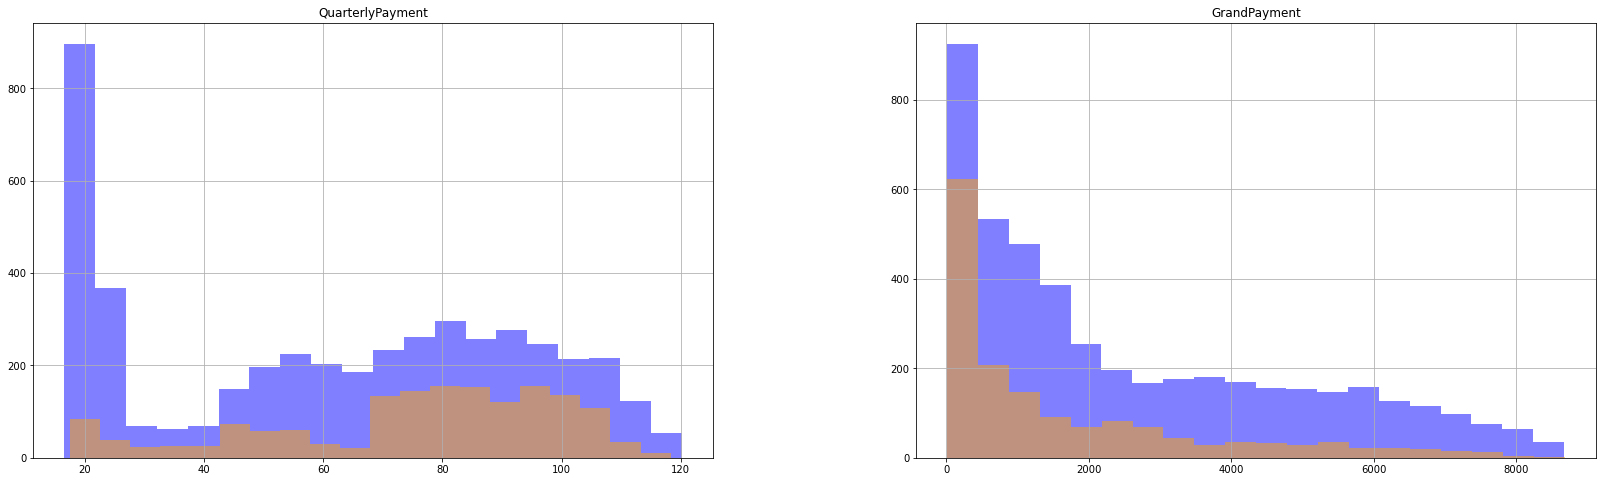

In [19]:
numerical_features = ['QuarterlyPayment', 'GrandPayment']
fig, ax = plt.subplots(1, 2, figsize=(28, 8))
df[df.CustomerAttrition == 'No'][numerical_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df[df.CustomerAttrition == 'Yes'][numerical_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

In [20]:
#Remove the unnecessary column customerID
cleaned_df = df.drop('ID', axis=1)

In [21]:
cleaned_df.shape

(6195, 15)

In [22]:
cleaned_df.head(4)

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No


In [23]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
   if cleaned_df[column].dtype == np.number:
      continue
   cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

<ipython-input-23-4d38c410cc28>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:


In [24]:
cleaned_df.dtypes

sex                      int32
Aged                     int32
Married                  int32
TotalDependents          int32
ServiceSpan              int64
MobileService            int32
4GService                int32
CyberProtection          int32
HardwareSupport          int32
TechnicalAssistance      int32
FilmSubscription         int32
SettlementProcess        int32
QuarterlyPayment       float64
GrandPayment           float64
CustomerAttrition        int32
dtype: object

In [25]:
#Show the first 5 rows of the new data set
cleaned_df.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,0,0,0,1,48,1,2,0,1,1,0,2,96.259802,4628.129119,1
1,1,0,1,0,45,1,2,0,0,0,1,0,18.876470,922.085998,0
2,1,1,1,0,59,1,2,1,0,1,0,1,106.016057,6205.891129,1
3,1,0,0,0,14,1,2,0,0,0,0,2,80.108839,1248.655391,0
4,0,0,1,1,25,1,2,0,1,0,1,2,51.529773,1285.321277,0


In [26]:
for col in cleaned_df:
    print(f'{col}:{cleaned_df[col].unique()}')

sex:[0 1]
Aged:[0 1]
Married:[0 1]
TotalDependents:[1 0]
ServiceSpan:[48 45 59 14 25 27 53  0  1 46 67 24 61 54  9 30 18  5 64  3 41 40 31 21
 15  6 69 72 33 71  2 36  8 37 34 28 60 22 68 11 39 58 10 50  4 44 49 38
 55 51 16 65 13 26 19 57 70 73 42 35 62 23 56 47 63 32 29  7 20 43 12 52
 17 66]
MobileService:[1 0]
4GService:[2 1 0]
CyberProtection:[0 1]
HardwareSupport:[1 0]
TechnicalAssistance:[1 0]
FilmSubscription:[0 1]
SettlementProcess:[2 0 1 3]
QuarterlyPayment:[ 96.25980197  18.87647016 106.0160571  ...  35.94171339  94.76298428
  94.3373432 ]
GrandPayment:[4628.129119   922.0859985 6205.891129  ...  552.1813408 4563.812326
 5756.542013 ]
CustomerAttrition:[1 0]


In [27]:
cleaned_df['log_GrandPayment'] = np.log(cleaned_df['GrandPayment'])
# We created a new column to store the log values

In [28]:
cols_to_scale = ['ServiceSpan','QuarterlyPayment','GrandPayment','log_GrandPayment']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cleaned_df[cols_to_scale] = scaler.fit_transform(cleaned_df[cols_to_scale])

In [29]:
cleaned_df.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition,log_GrandPayment
0,0,0,0,1,0.657534,1,2,0,1,1,0,2,0.769434,0.531909,1,0.898859
1,1,0,1,0,0.616438,1,2,0,0,0,1,0,0.022887,0.104386,0,0.639676
2,1,1,1,0,0.808219,1,2,1,0,1,0,1,0.863556,0.713916,1,0.945988
3,1,0,0,0,0.191781,1,2,0,0,0,0,2,0.613619,0.142058,0,0.688385
4,0,0,1,1,0.342466,1,2,0,1,0,1,2,0.337906,0.146288,0,0.693034


In [30]:
cleaned_df.shape

(6195, 16)

In [31]:
#Scale the cleaned data
X = cleaned_df.drop('CustomerAttrition', axis = 1) 
y = cleaned_df['CustomerAttrition']
#Standardizing/scaling the features
X = StandardScaler().fit_transform(X)

In [44]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [46]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(x_train)

In [47]:
# select all rows that are not outliers
mask = yhat != -1
x_train, y_train = x_train[mask, :], y_train[mask]

In [48]:
# summarize the shape of the updated training dataset
print(x_train.shape, y_train.shape)

(4638, 15) (4638,)


In [49]:
# Make predictions on validation dataset with Logistic Regression 
logic = LogisticRegression()
logic.fit(x_train, y_train)
predictions = logic.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7869593285990962
[[1051   95]
 [ 235  168]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1146
           1       0.64      0.42      0.50       403

    accuracy                           0.79      1549
   macro avg       0.73      0.67      0.68      1549
weighted avg       0.77      0.79      0.77      1549

